### What is the dataset story and describe 

In [1]:
import seaborn as sns
planets=sns.load_dataset("planets")
planets.head() 

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [2]:
# in here i taked the copy of main dataset
df=planets.copy()

In [3]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [5]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [6]:
import pandas as pd 
df["method"]= pd.Categorical(df["method"])
# or we can write in this way
# df.method = pd.Categorical(df.method)
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

In [7]:
df.shape

(1035, 6)

In [8]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [9]:
# Describe function ignore the nan and categorical variables 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [10]:
# otherwise 
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
method,1035,10,Radial Velocity,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,1035.0,NaN,NaN,NaN,1.785507,1.240976,1.0,1.0,1.0,2.0,7.0
orbital_period,992.0,NaN,NaN,NaN,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,NaN,NaN,NaN,2.638161,3.818617,0.0036,0.229,1.26,3.04,25.0
distance,808.0,NaN,NaN,NaN,264.069282,733.116493,1.35,32.56,55.25,178.5,8500.0
year,1035.0,NaN,NaN,NaN,2009.070531,3.972567,1989.0,2007.0,2010.0,2012.0,2014.0


### Fast solution for missing data

In [11]:
import seaborn as sns
planets=sns.load_dataset("planets")
planets.head() 
df= planets.copy()

In [12]:
df.isnull().values.any()

True

In [13]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [14]:
## First Approach
# df["mass"].fillna(0 , inplace=True)

## Second Approach
# df.dropna()


In [15]:
df["orbital_period"].fillna(df["mass"].mean(), inplace=True)

In [16]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

In [17]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

### Categorical Variable

In [18]:
import seaborn as sns
planets=sns.load_dataset("planets")
planets.head() 
df= planets.copy()

In [19]:
cat_df = df.select_dtypes(include=["object"])
cat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [20]:
for i in cat_df["method"].unique():
    print(i)
    

Radial Velocity
Imaging
Eclipse Timing Variations
Transit
Astrometry
Transit Timing Variations
Orbital Brightness Modulation
Microlensing
Pulsar Timing
Pulsation Timing Variations


In [21]:
cat_df["method"].value_counts()

method
Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: count, dtype: int64

In [22]:
cat_df["method"].unique()
import pandas as pd

example_df = pd.DataFrame(
    cat_df["method"].unique(),
    columns=["method"],
)

example_df

,method
0,Radial Velocity
1,Imaging
2,Eclipse Timing Variations
3,Transit
4,Astrometry
5,Transit Timing Variations
6,Orbital Brightness Modulation
7,Microlensing
8,Pulsar Timing
9,Pulsation Timing Variations


In [23]:
example_df.count()

method    10
dtype: int64

### Continuously Variable

In [24]:
import seaborn as sns
planets=sns.load_dataset("planets")
df=planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [25]:
df_num=df.select_dtypes(include=["float64","int64"])
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [26]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [27]:
df_num[["distance"]].describe().T

,count,mean,std,min,25%,50%,75%,max
distance,808.0,264.069282,733.116493,1.35,32.56,55.25,178.5,8500.0


# Barplot and Catplot for Categorical variables

### Barplot

In [28]:
import seaborn as sns 
diamonds=sns.load_dataset("diamonds")
df=diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [31]:
df["cut"].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [32]:
df["cut"].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

Text(0.5, 1.0, 'Cut Variable')

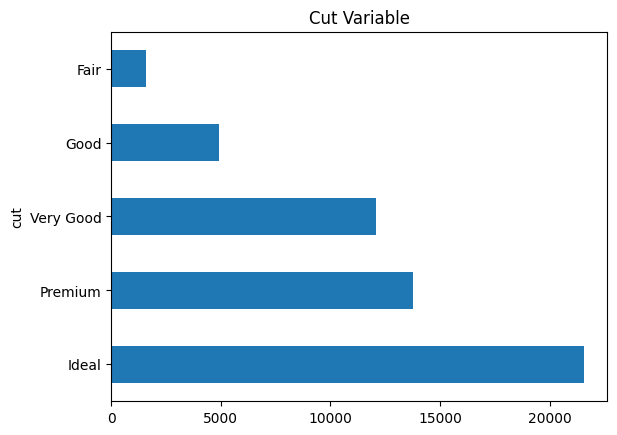

In [33]:
# with pandas 

(df["cut"]
.value_counts()
.plot.barh()
.set_title("Cut Variable"))

<Axes: xlabel='cut'>

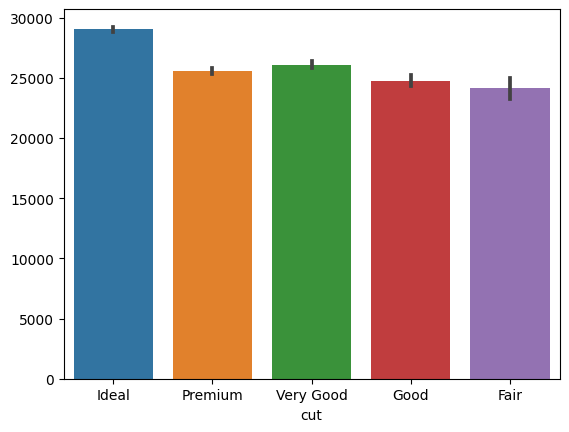

In [34]:
sns.barplot(
    x="cut",
    y=df["cut"].index,
    data=df,
)

In [35]:
import seaborn as sns
from pandas.api.types import CategoricalDtype

diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
cut_categories = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
df["cut"] = df["cut"].astype(CategoricalDtype(categories=cut_categories, ordered=True))

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<Axes: xlabel='cut'>

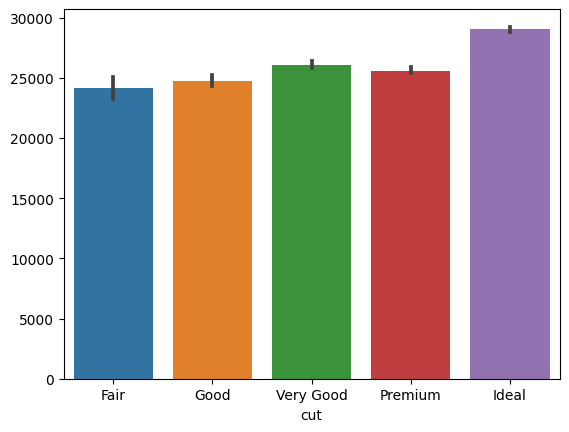

In [36]:
sns.barplot(
    x="cut",
    y=df["cut"].index,
    data=df,
)

### Catplot

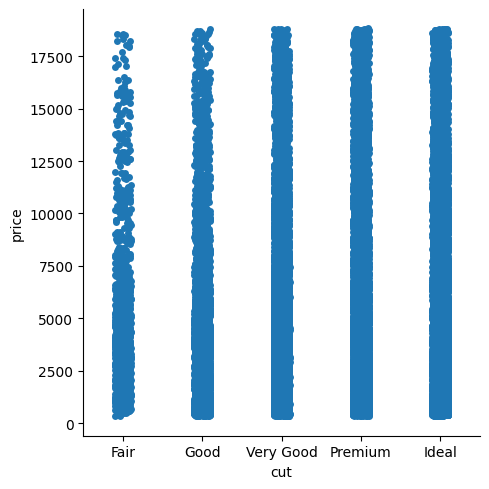

In [37]:
sns.catplot(x="cut", y="price", data=df)

<Axes: xlabel='cut', ylabel='price'>

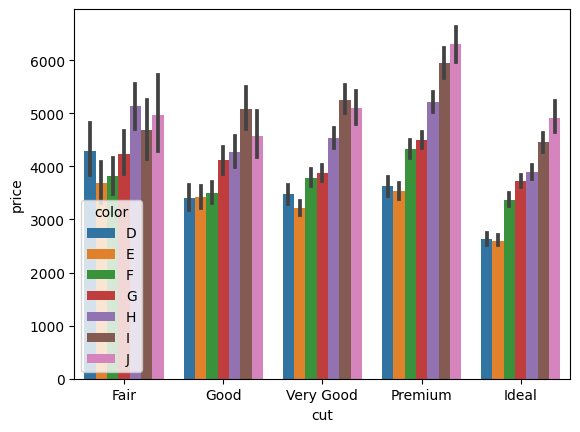

In [38]:
sns.barplot(
    x="cut",
    y="price",
    hue="color",
    data=df,
)

In [39]:
df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

# For the Numeric variables

### Displot and Kdeplot

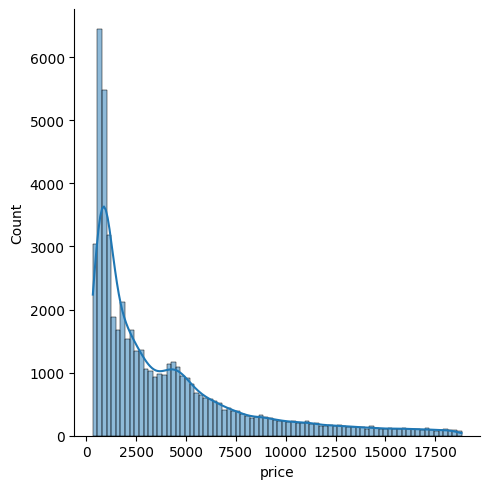

In [40]:
sns.displot(
    x="price",
    data=df,
    kde=True,
)

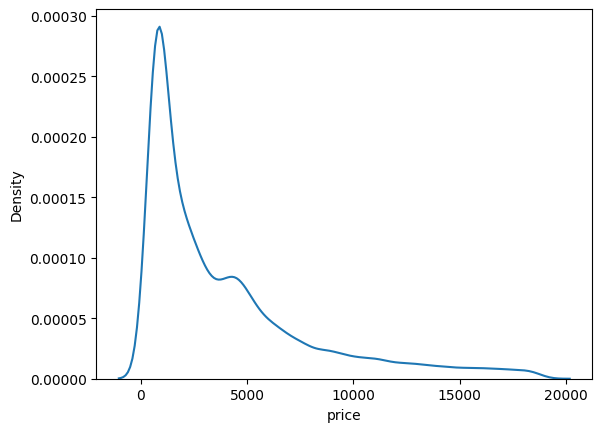

In [41]:
sns.kdeplot(
    x="price",
    data=df,
);

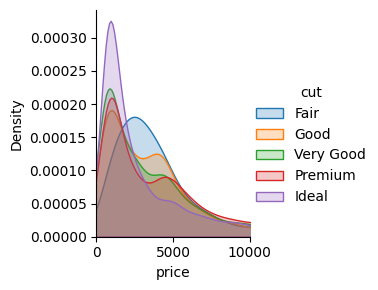

In [42]:
# Grafik üzerine eklenen boyutları bölmek için kullanılır.
(
    sns.FacetGrid(
        data=df,
        hue="cut",
        xlim=(0, 10000),
    )
    .map(
        sns.kdeplot,
        "price",
        fill=True,
    )
    .add_legend()
);


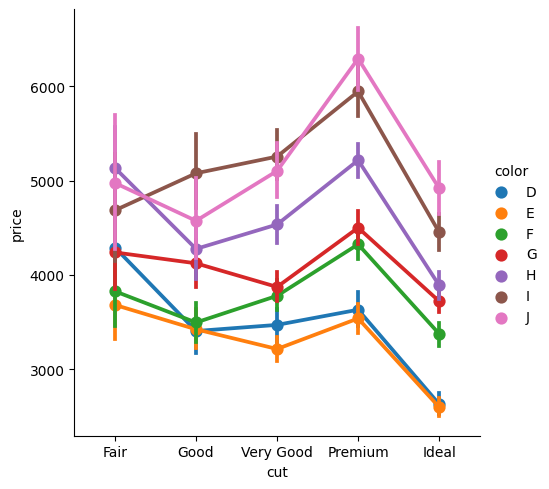

In [43]:
sns.catplot(
    x="cut",
    y="price",
    hue="color",
    kind="point",
    data=df,
);

### Boxplot

In [44]:
import seaborn as sns 
tips=sns.load_dataset("tips")
df=tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [47]:
df["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [48]:
df["sex"].value_counts().count()

2

In [49]:
df["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

<Axes: xlabel='total_bill'>

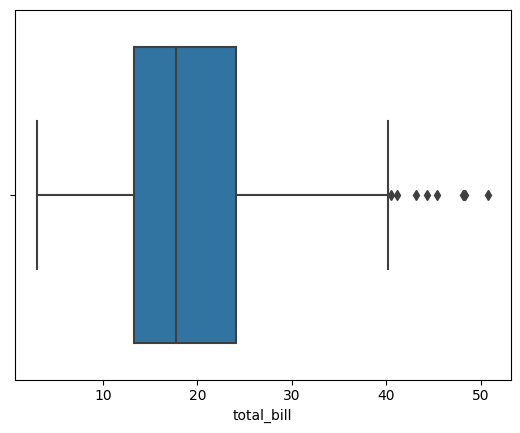

In [50]:
sns.boxplot(
    x="total_bill",
    data=df,
)

In [51]:
df.groupby("day")["total_bill"].aggregate("mean")

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

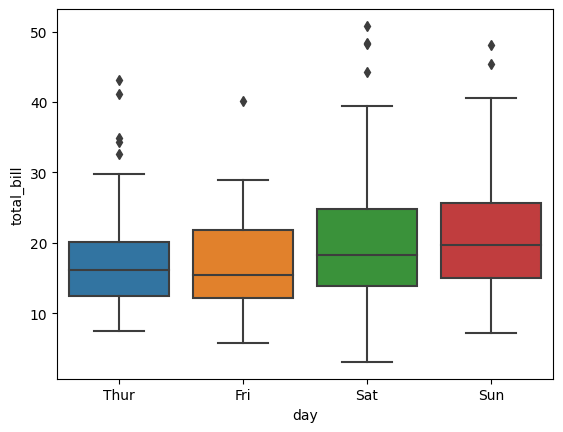

In [52]:
sns.boxplot(
    x="day",
    y="total_bill",
    data=df,
);

<Axes: xlabel='time', ylabel='total_bill'>

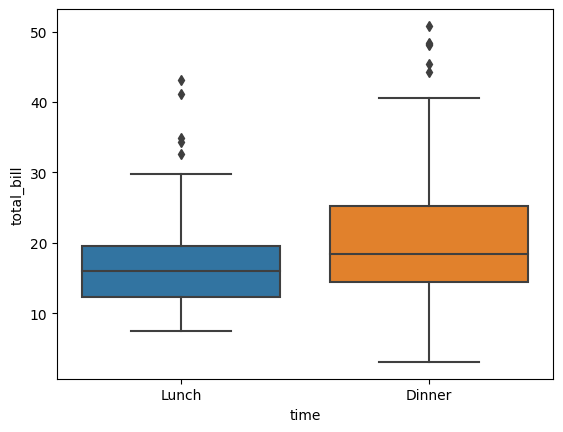

In [53]:
sns.boxplot(
    x="time",
    y="total_bill",
    data=df,
)

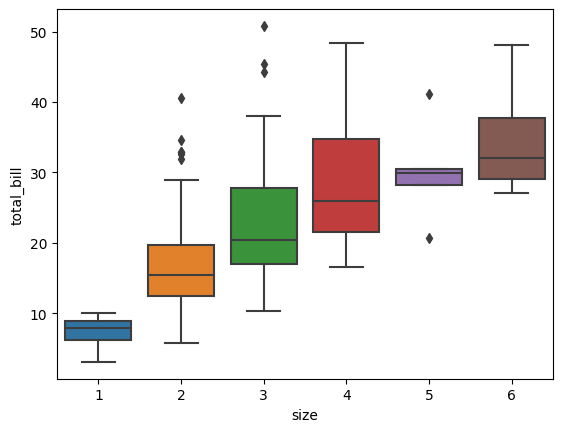

In [54]:
sns.boxplot(
    x="size",
    y="total_bill",
    data=df,
);

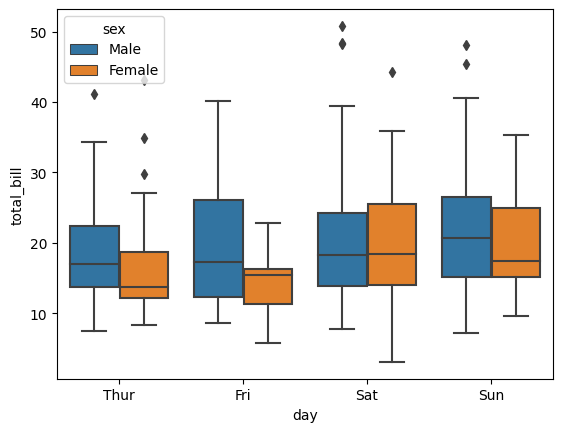

In [55]:
sns.boxplot(
    x="day",
    y="total_bill",
    hue="sex",
    data=df,
);

### Violin

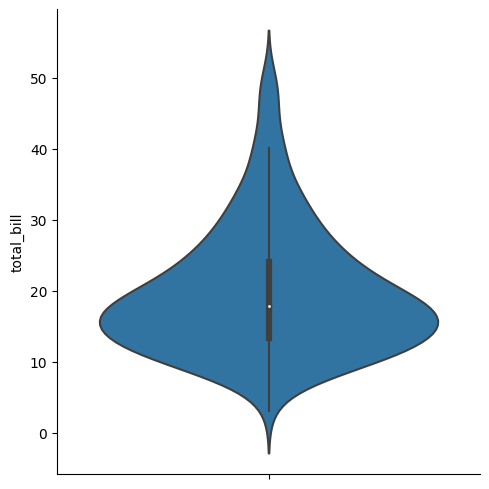

In [56]:
sns.catplot(
    y="total_bill",
    kind="violin",
    data=df,
)

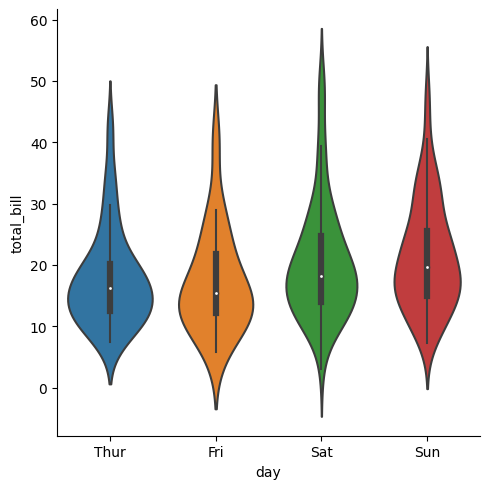

In [57]:
sns.catplot(
    x="day",
    y="total_bill",
    kind="violin",
    data=df,
)

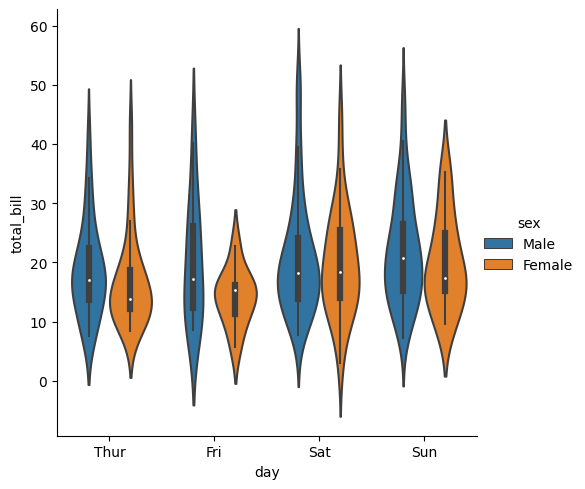

In [58]:
sns.catplot(
    x="day",
    y="total_bill",
    hue="sex",
    kind="violin",
    data=df,
);

### Scatterplot

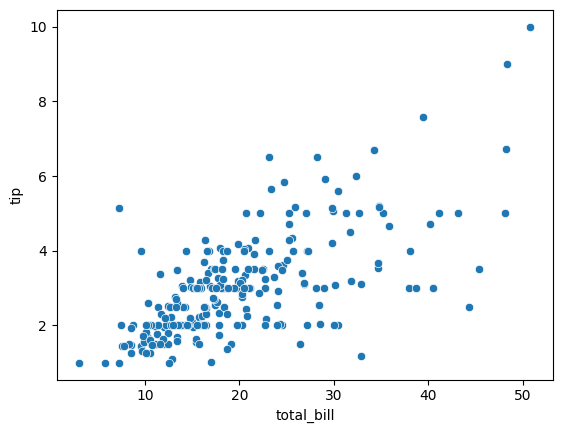

In [59]:
sns.scatterplot(
    x="total_bill",
    y="tip",
    data=df,
);

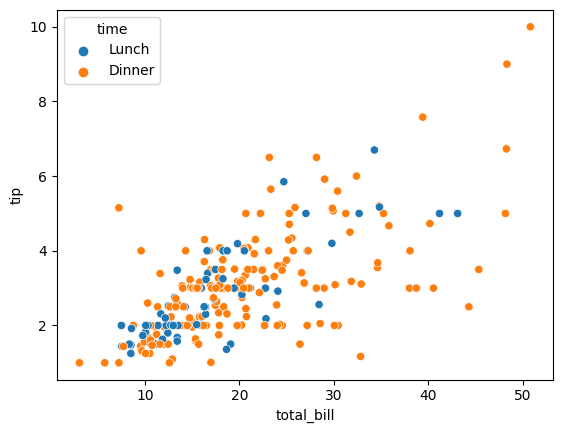

In [62]:

sns.scatterplot(
    x="total_bill",
    y="tip",
    hue="time",
    data=df,
);

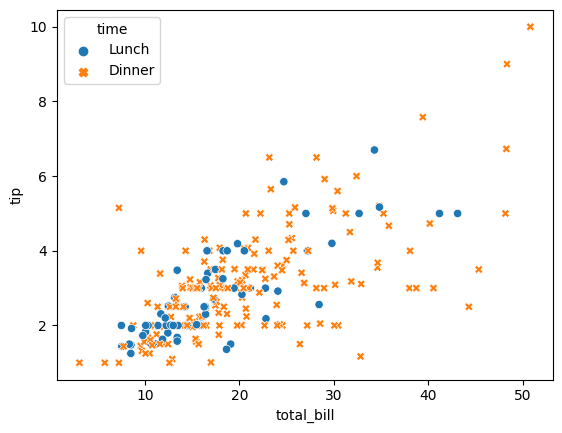

In [64]:
sns.scatterplot(
    x="total_bill",
    y="tip",
    hue="time",
    style="time",
    data=df,
);

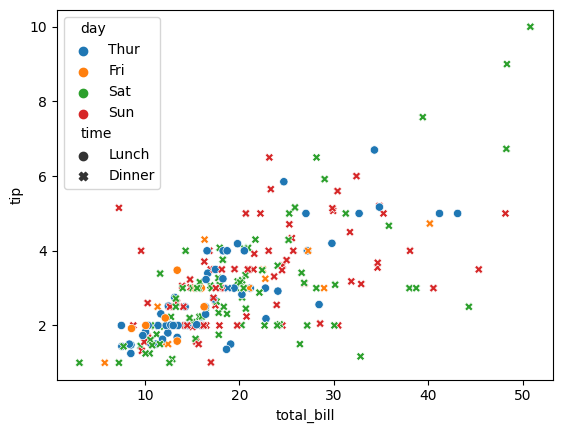

In [65]:
sns.scatterplot(
    x="total_bill",
    y="tip",
    hue="day",
    style="time",
    data=df,
);

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")
df = tips.copy()

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


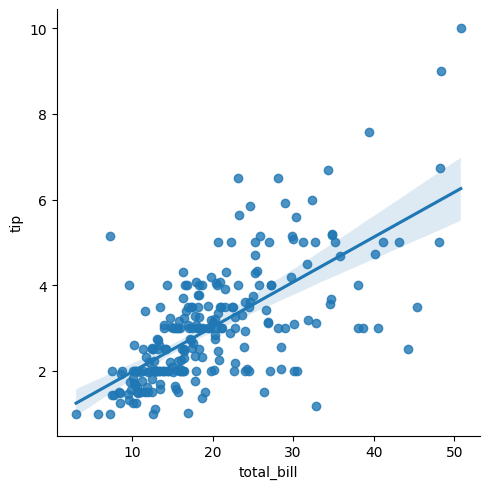

In [5]:
sns.lmplot(
    x="total_bill",
    y="tip",
    data=df,
);

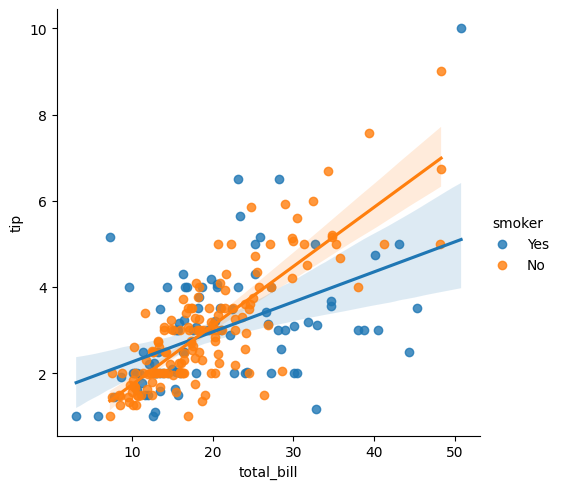

In [7]:
sns.lmplot(
    x="total_bill",
    y="tip",
    hue="smoker",
    data=df,
);

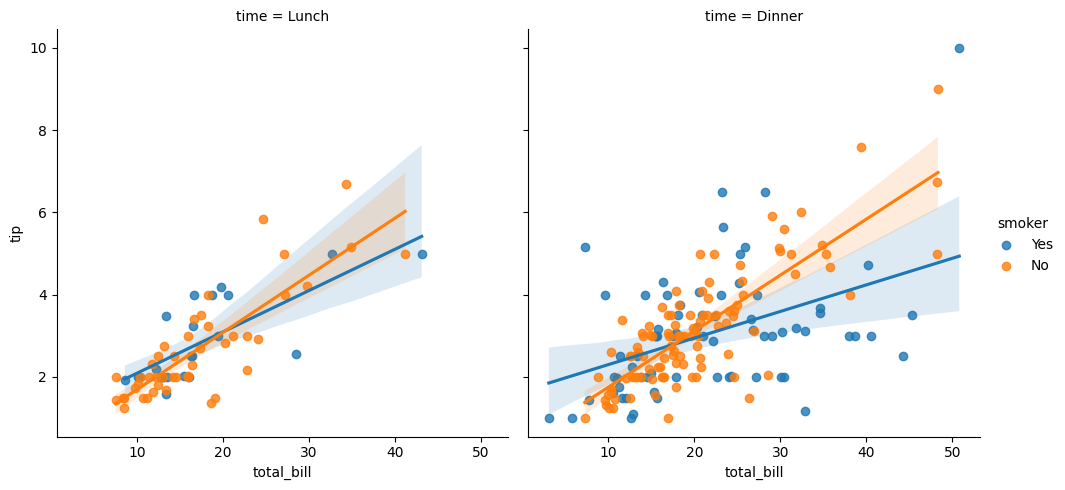

In [9]:
sns.lmplot(
    x="total_bill",
    y="tip",
    hue="smoker",
    col="time",
    data=df,
);

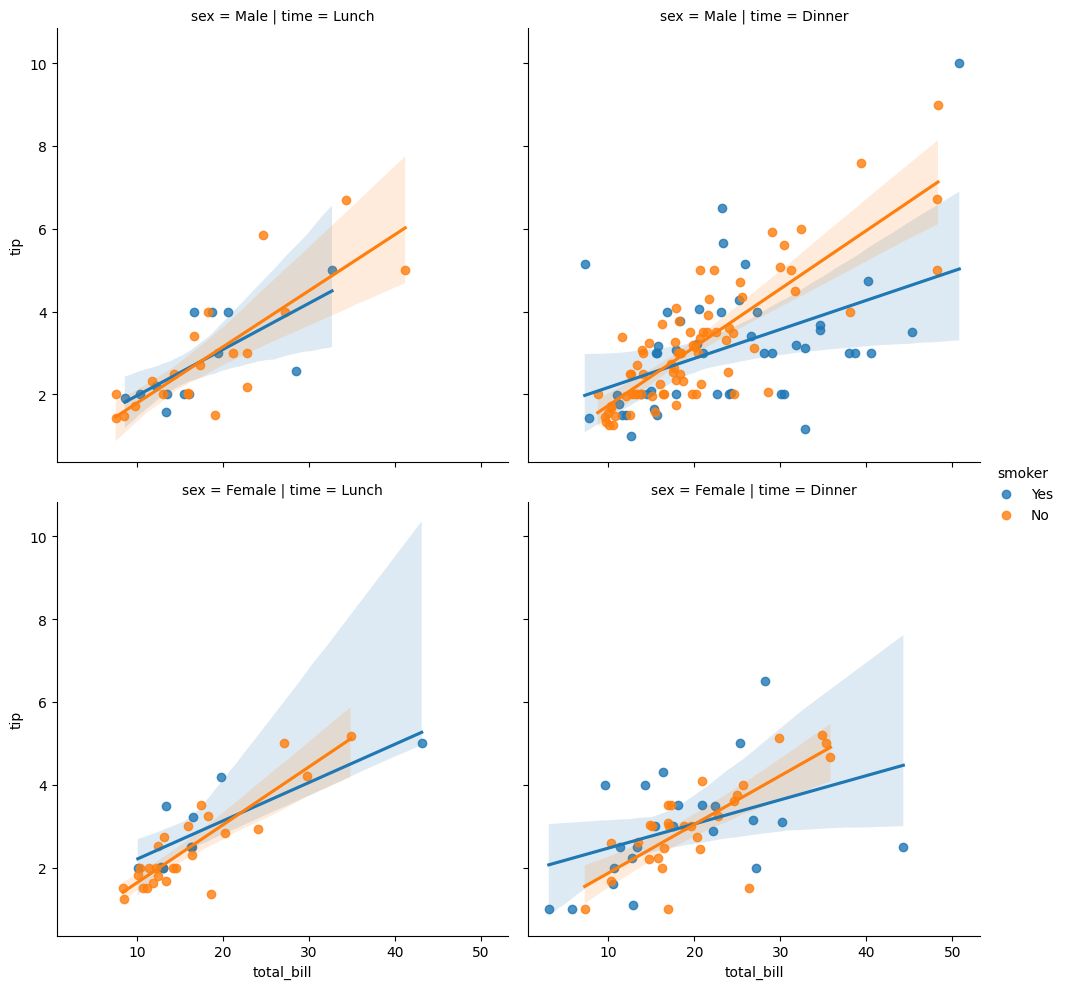

In [10]:
sns.lmplot(
    x="total_bill",
    y="tip",
    hue="smoker",
    col="time",
    row="sex",
    data=df,
);

### Scatterplot Matrix


In [11]:
import seaborn as sns 
iris=sns.load_dataset("iris")
df=iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


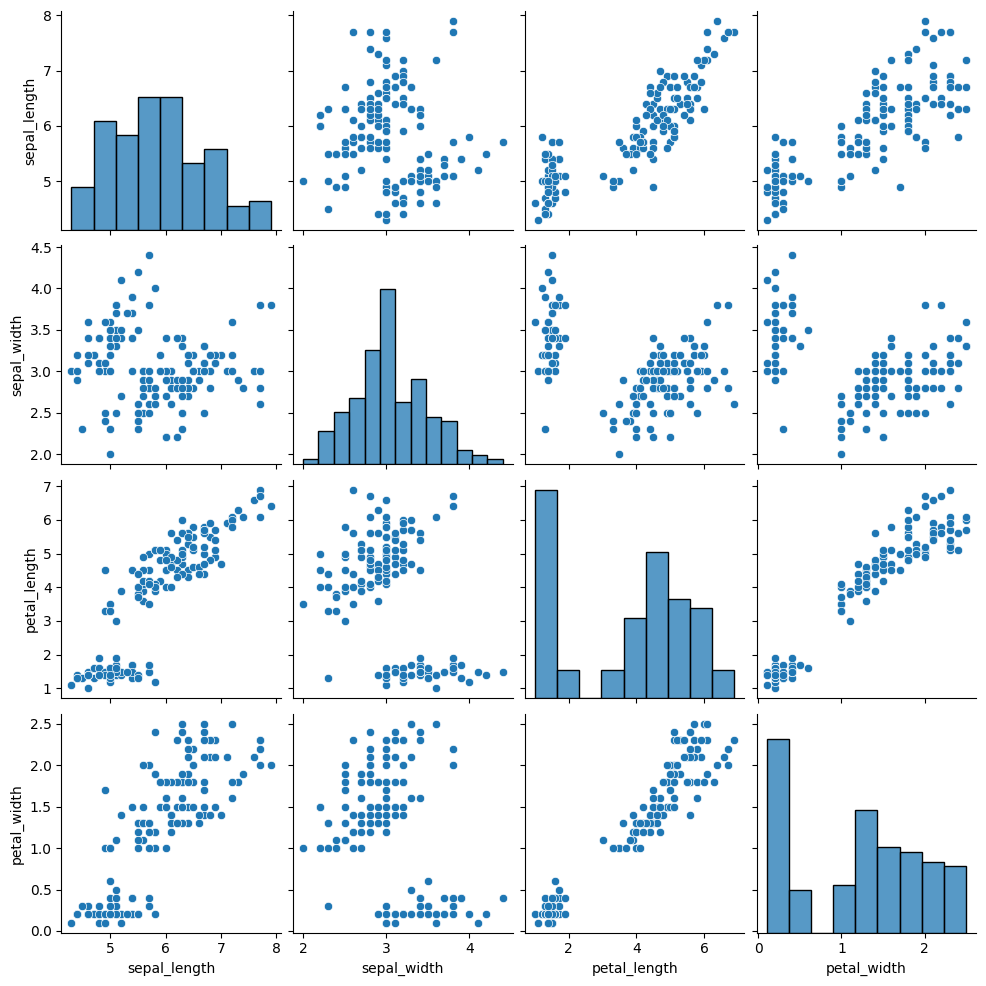

In [14]:
sns.pairplot(data=df);

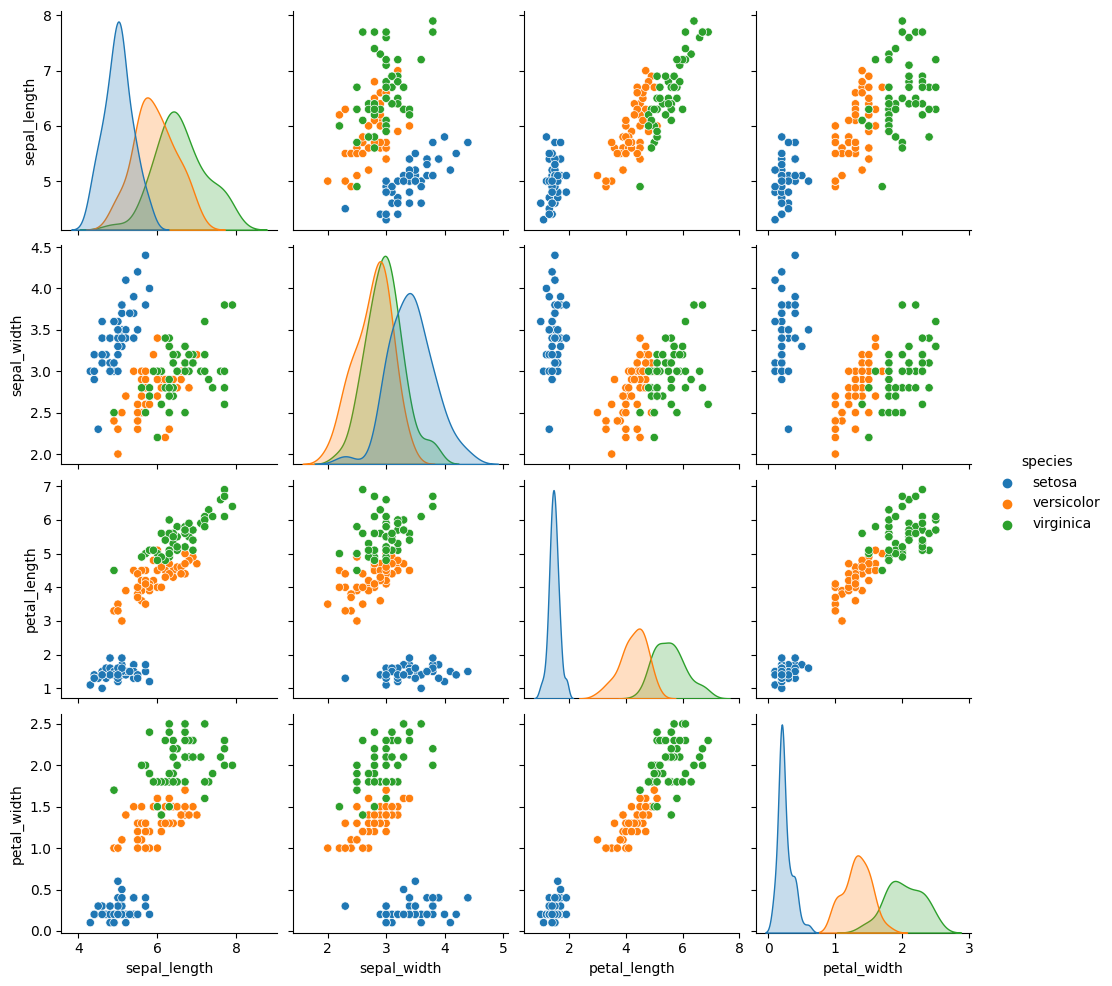

In [16]:
sns.pairplot(
    hue="species",
    data=df,
);

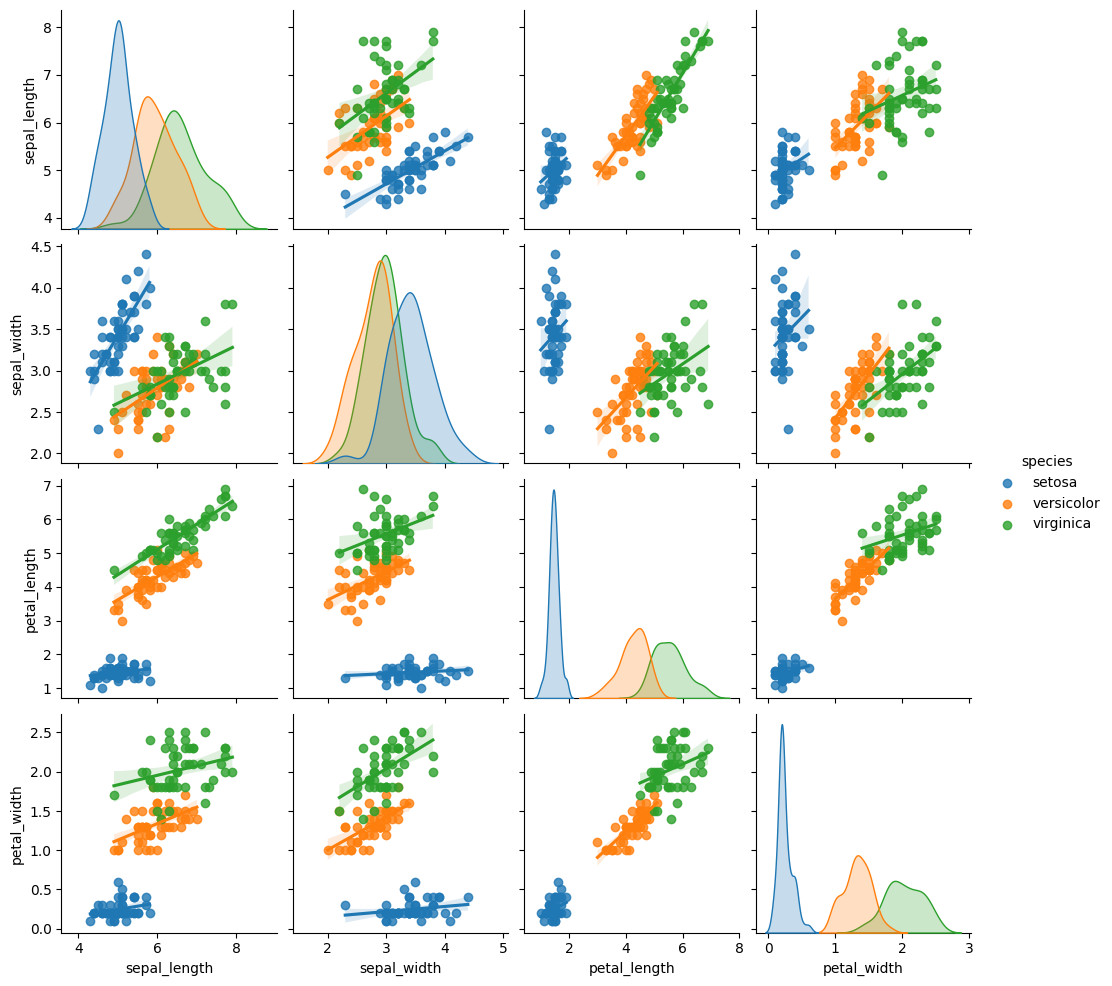

In [18]:
sns.pairplot(
    hue="species",
    kind="reg",
    data=df,
);

### Heatmap

In [20]:
import seaborn as sns 
flights=sns.load_dataset("flights")
df=flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,144.0,1954.500000,3.464102,1949.0,1951.75,1954.5,1957.25,1960.0
passengers,144.0,280.298611,119.966317,104.0,180.00,265.5,360.50,622.0


In [27]:
df=df.pivot_table(
    columns="year",
    index="month",
    values="passengers",
)

<Axes: xlabel='year', ylabel='month'>

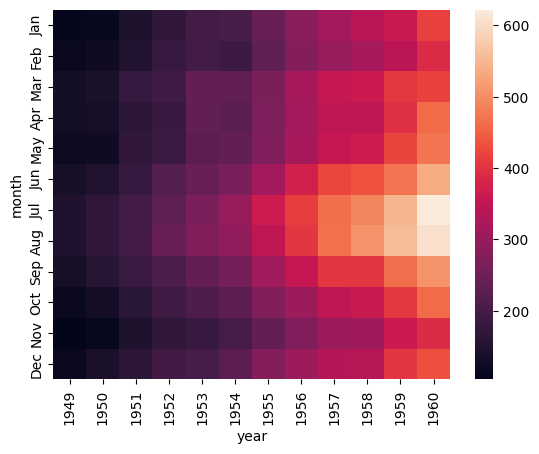

In [28]:
sns.heatmap(df)

<Axes: xlabel='year', ylabel='month'>

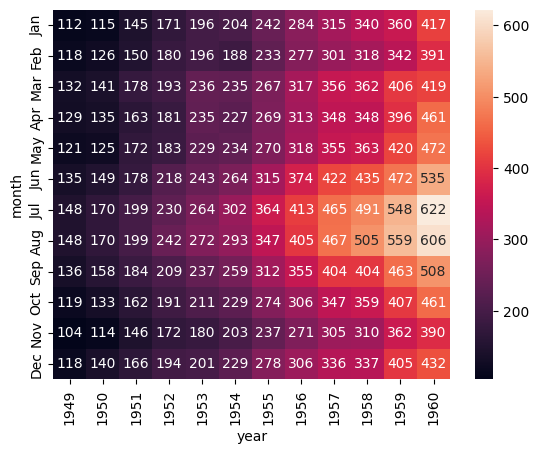

In [33]:
sns.heatmap(
    annot=True,
    fmt="d",
    data=df,
)

<Axes: xlabel='year', ylabel='month'>

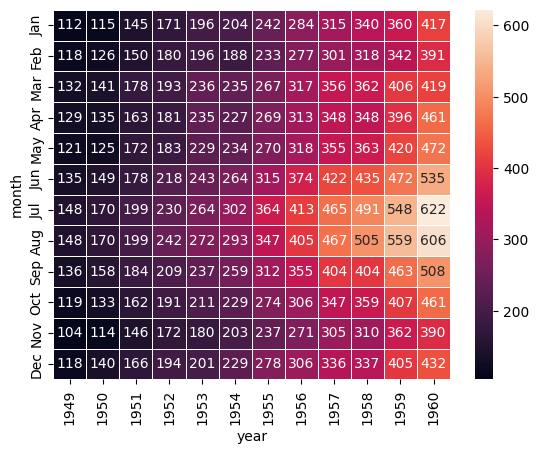

In [34]:
sns.heatmap(
    annot=True,
    fmt="d",
    linewidths=0.5,
    data=df,
)

### Lineplot

In [36]:
import seaborn as sns
fmri=sns.load_dataset("fmri")
df=fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [39]:
df[["timepoint"]].describe()

,timepoint
count,1064.000000
mean,9.000000
std,5.479801
min,0.000000
25%,4.000000
50%,9.000000
75%,14.000000
max,18.000000


In [41]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [43]:
df.groupby("timepoint")[["signal"]].count()

,signal
timepoint,
0,56
1,56
2,56
3,56
4,56
5,56
6,56
7,56
8,56


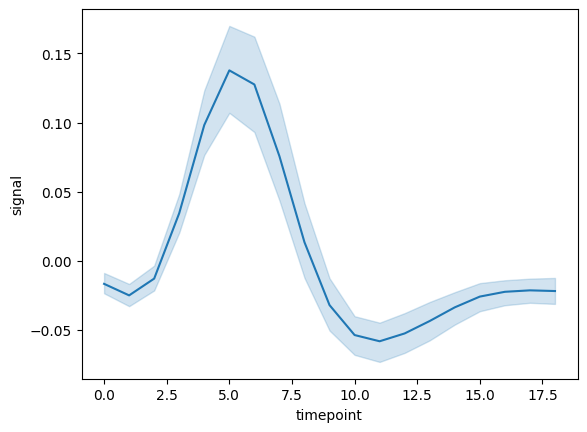

In [44]:
sns.lineplot(
    x="timepoint",
    y="signal",
    data=df,
);

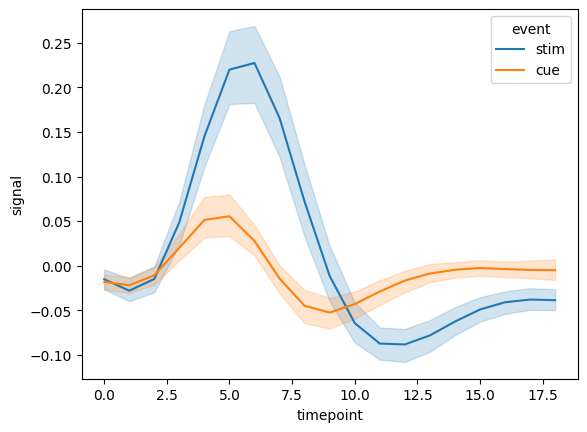

In [45]:
sns.lineplot(
    x="timepoint",
    y="signal",
    hue="event",
    data=df,
);

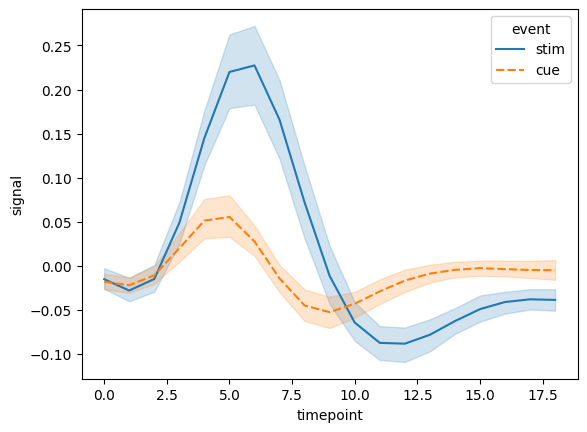

In [46]:
sns.lineplot(
    x="timepoint",
    y="signal",
    hue="event",
    style="event",
    data=df,
);

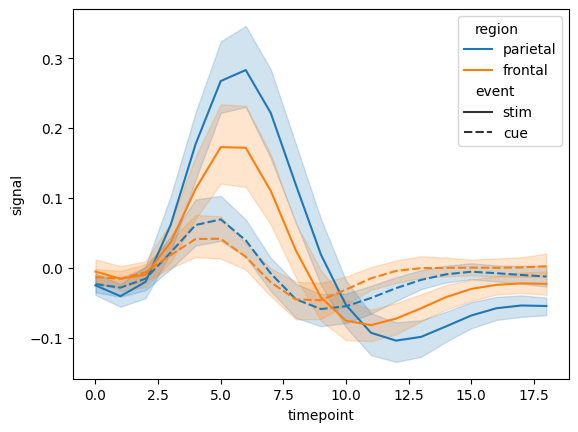

In [47]:
sns.lineplot(
    x="timepoint",
    y="signal",
    hue="region",
    style="event",
    data=df,
);

### Time Series Graphic

In [64]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [65]:
import yfinance as yf
df = yf.download("AAPL", start="2020-01-01", end="2023-01-01")

[*********************100%%**********************]  1 of 1 completed


In [67]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477585,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504547,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.059372,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.378006,77034200


<Axes: xlabel='Date'>

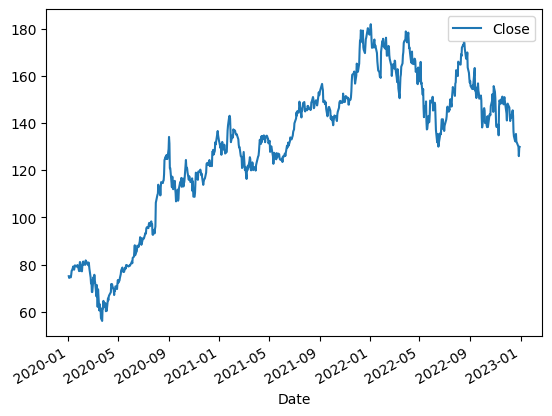

In [69]:
df[["Close"]].plot()

In [74]:
df["Close"].index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=756, freq=None)

In [76]:
import pandas as pd

In [77]:
df["Close"].index=pd.DatetimeIndex(df["Close"])

In [78]:
df["Close"].index

DatetimeIndex(['1970-01-01 00:00:00.000000075',
               '1970-01-01 00:00:00.000000074',
               '1970-01-01 00:00:00.000000074',
               '1970-01-01 00:00:00.000000074',
               '1970-01-01 00:00:00.000000075',
               '1970-01-01 00:00:00.000000077',
               '1970-01-01 00:00:00.000000077',
               '1970-01-01 00:00:00.000000079',
               '1970-01-01 00:00:00.000000078',
               '1970-01-01 00:00:00.000000077',
               ...
               '1970-01-01 00:00:00.000000134',
               '1970-01-01 00:00:00.000000132',
               '1970-01-01 00:00:00.000000132',
               '1970-01-01 00:00:00.000000135',
               '1970-01-01 00:00:00.000000132',
               '1970-01-01 00:00:00.000000131',
               '1970-01-01 00:00:00.000000130',
               '1970-01-01 00:00:00.000000126',
               '1970-01-01 00:00:00.000000129',
               '1970-01-01 00:00:00.000000129'],
              dtype=